In [105]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [106]:
df=pd.read_csv("telechurn500.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [107]:
(df.customerID.unique()).size

500

In [108]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [65]:
import numpy as np    
idx_0 = np.where(df.Churn=='No')
idx_1 = np.where(df.Churn=='Yes')

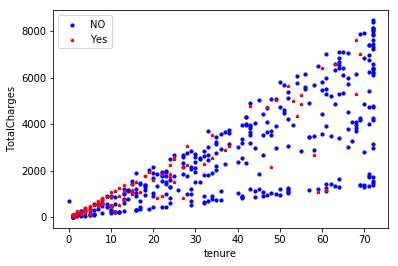

In [66]:
plt.scatter(df.iloc[idx_0].tenure, df.iloc[idx_0].TotalCharges, s=10, c='b', marker="o", label='NO')
plt.scatter(df.iloc[idx_1].tenure, df.iloc[idx_1].TotalCharges, s=10, c='r', marker="*", label='Yes')
plt.ylabel('TotalCharges')
plt.xlabel('tenure')
plt.legend()
plt.show()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
customerID          500 non-null object
gender              500 non-null object
SeniorCitizen       500 non-null int64
Partner             500 non-null object
Dependents          500 non-null object
tenure              500 non-null int64
PhoneService        500 non-null object
MultipleLines       500 non-null object
InternetService     500 non-null object
OnlineSecurity      500 non-null object
OnlineBackup        500 non-null object
DeviceProtection    500 non-null object
TechSupport         500 non-null object
StreamingTV         500 non-null object
StreamingMovies     500 non-null object
Contract            500 non-null object
PaperlessBilling    500 non-null object
PaymentMethod       500 non-null object
MonthlyCharges      500 non-null float64
TotalCharges        500 non-null float64
Churn               500 non-null object
dtypes: float64(2), int64(2), object(17)
memory usage: 

In [109]:
X=df.iloc[:,1:20]
X[0:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [110]:
y=df.iloc[:,20]
y[0:5]

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [111]:
print(df.gender.unique())
print(df.Partner.unique())
print(df.Dependents.unique())
print(df.PhoneService.unique())
print(df.MultipleLines.unique())
print(df.InternetService.unique())
print(df.OnlineSecurity.unique())
print(df.OnlineBackup.unique())
print(df.DeviceProtection.unique())
print(df.TechSupport.unique())
print(df.StreamingTV.unique())
print(df.StreamingMovies.unique())
print(df.OnlineBackup.unique())
print(df.DeviceProtection.unique())
print(df.Contract.unique())
print(df.PaperlessBilling.unique())
print(df.PaymentMethod.unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [113]:
from sklearn import preprocessing
le_garr= preprocessing.LabelEncoder()
le_garr.fit(X.gender.unique())
X.iloc[:,0] = le_garr.transform(X.iloc[:,0]) 

le_dep= preprocessing.LabelEncoder()
le_dep.fit(X.Dependents.unique())
X.iloc[:,3]= le_dep.transform(X.iloc[:,3]) 


le_psar= preprocessing.LabelEncoder()
le_psar.fit(X.PhoneService.unique())
X.iloc[:,5] = le_psar.transform(X.iloc[:,5]) 

le_mul= preprocessing.LabelEncoder()
le_mul.fit(X.MultipleLines.unique())
X.iloc[:,6] = le_mul.transform(X.iloc[:,6]) 

le_iser= preprocessing.LabelEncoder()
le_iser.fit(X.InternetService.unique())
X.iloc[:,7] = le_iser.transform(X.iloc[:,7]) 

le_osec= preprocessing.LabelEncoder()
le_osec.fit(X.OnlineSecurity.unique())
X.iloc[:,8] = le_osec.transform(X.iloc[:,8]) 

le_oba= preprocessing.LabelEncoder()
le_oba.fit(X.OnlineBackup.unique())
X.iloc[:,9] = le_oba.transform(X.iloc[:,9]) 

le_dpr= preprocessing.LabelEncoder()
le_dpr.fit(X.DeviceProtection.unique())
X.iloc[:,10]= le_dpr.transform(X.iloc[:,10]) 

le_dpr= preprocessing.LabelEncoder()
le_dpr.fit(X.TechSupport.unique())
X.iloc[:,11] = le_dpr.transform(X.iloc[:,11]) 

le_dpr= preprocessing.LabelEncoder()
le_dpr.fit(X.StreamingTV.unique())
X.iloc[:,12] = le_dpr.transform(X.iloc[:,12]) 

le_dpr= preprocessing.LabelEncoder()
le_dpr.fit(X.StreamingMovies.unique())
X.iloc[:,13] = le_dpr.transform(X.iloc[:,13]) 



In [114]:
le_ptnr= preprocessing.LabelEncoder()
le_ptnr.fit(X.Partner.unique())
X.iloc[:,2] = le_ptnr.transform(X.iloc[:,2]) 

In [115]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,One year,No,Mailed check,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65


In [116]:
le_cnt= preprocessing.LabelEncoder()
le_cnt.fit(X.Contract.unique())
X.iloc[:,14] = le_cnt.transform(X.iloc[:,14]) 

le_pbil= preprocessing.LabelEncoder()
le_pbil.fit(X.PaperlessBilling.unique())
X.iloc[:,15] = le_pbil.transform(X.iloc[:,15]) 

le_pmet= preprocessing.LabelEncoder()
le_pmet.fit(X.PaymentMethod.unique())
X.iloc[:,16] = le_pmet.transform(X.iloc[:,16]) 

In [117]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [118]:
X.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.484000,0.168000,0.484000,0.312000,31.454000,0.890000,0.902000,0.838000,0.764000,0.960000,0.876000,0.784000,0.976000,1.032000,0.668000,0.602000,1.554000,65.973900,2220.367940
std,0.500244,0.374241,0.500244,0.463774,24.415489,0.313203,0.939234,0.721663,0.868223,0.898897,0.891186,0.873424,0.899468,0.899218,0.831359,0.489976,1.086944,29.554493,2197.608532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.950000,19.150000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,44.225000,421.700000
50%,0.000000,0.000000,0.000000,0.000000,27.500000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,71.525000,1363.875000
75%,1.000000,0.000000,1.000000,1.000000,52.250000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.937500,3569.837500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,116.050000,8468.200000


In [19]:
#calculating any null values
X.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [36]:
y_df=y.to_frame()
y_df.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [39]:
print("XShape:",X.shape)
print("YShape:",y.shape)

XShape: (500, 19)
YShape: (500,)


In [44]:
XY_df=X
XY_df['Churn']=y_df
print(XY_df.shape)
XY_df.head()

(500, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


[Text(0.5,0,'gender'),
 Text(1.5,0,'SeniorCitizen'),
 Text(2.5,0,'Partner'),
 Text(3.5,0,'Dependents'),
 Text(4.5,0,'tenure'),
 Text(5.5,0,'PhoneService'),
 Text(6.5,0,'MultipleLines'),
 Text(7.5,0,'InternetService'),
 Text(8.5,0,'OnlineSecurity'),
 Text(9.5,0,'OnlineBackup'),
 Text(10.5,0,'DeviceProtection'),
 Text(11.5,0,'TechSupport'),
 Text(12.5,0,'StreamingTV'),
 Text(13.5,0,'StreamingMovies'),
 Text(14.5,0,'Contract'),
 Text(15.5,0,'PaperlessBilling'),
 Text(16.5,0,'PaymentMethod'),
 Text(17.5,0,'MonthlyCharges'),
 Text(18.5,0,'TotalCharges'),
 Text(19.5,0,'Churn')]

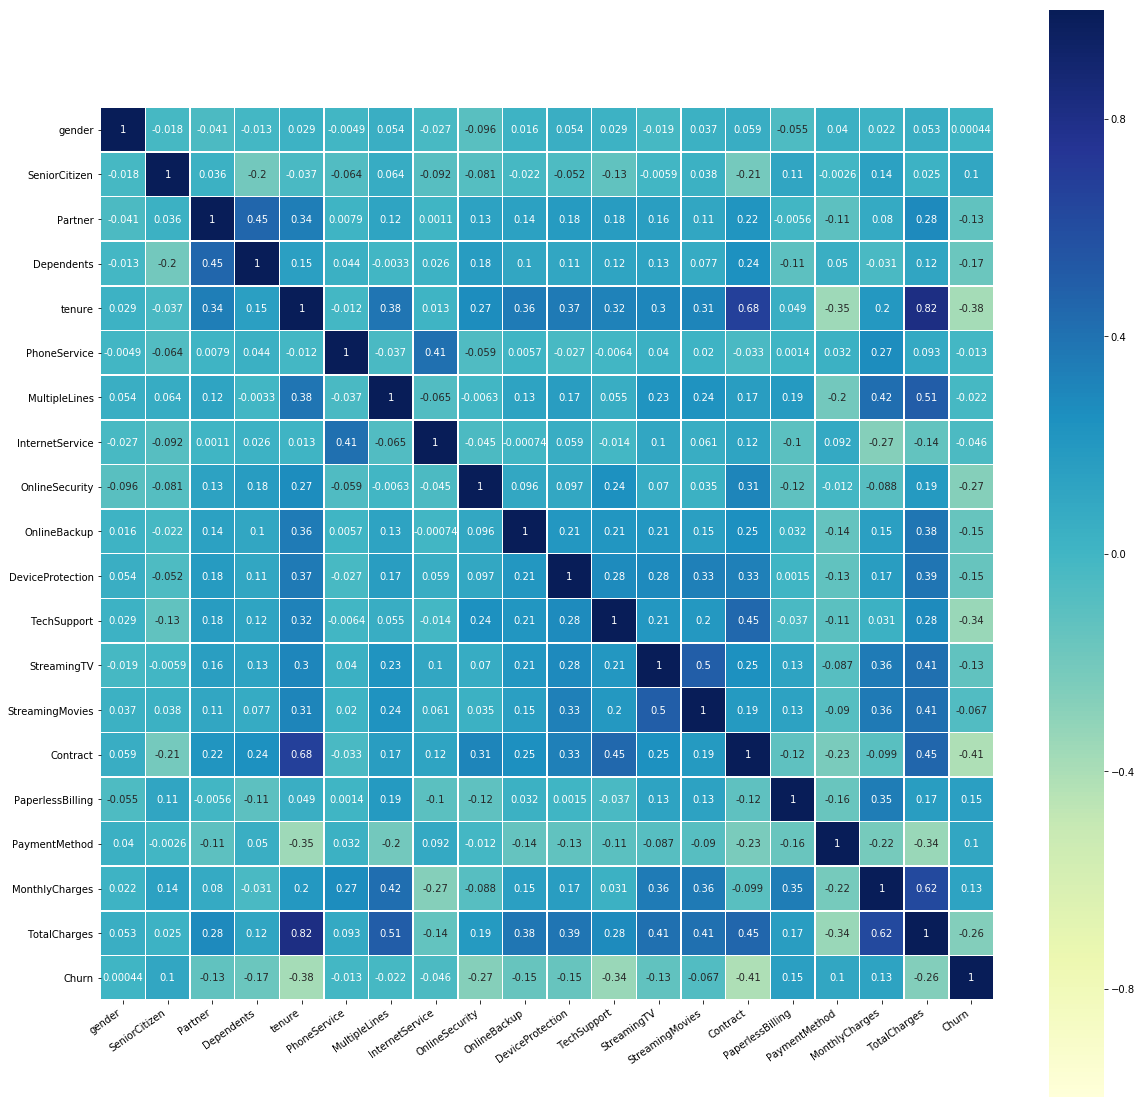

In [46]:
#A simple correlation plot usong seaborn. The below plot shows how the different variables correlate with each other

import seaborn as sns
import matplotlib.pyplot as plt

corr = XY_df.corr()
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot=True,
    linewidths=.5,
    cmap="YlGnBu" )

#Rotating labels on x axis
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=35,
    horizontalalignment='right'
)

In [49]:
fig.savefig("Heatmap.png")

In [119]:
y.unique()

array(['No', 'Yes'], dtype=object)

In [131]:
le_y=preprocessing.LabelEncoder()
le_y.fit(y.unique())
y.iloc[:] = le_y.transform(y.iloc[:]) 

In [121]:
y[0:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [122]:
#normalize the data
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.97, -0.45,  1.03, -0.67, -1.25, -2.84,  0.1 , -1.16, -0.88,
         1.16, -0.98, -0.9 , -1.09, -1.15, -0.8 ,  0.81,  0.41, -1.22,
        -1.  ],
       [ 1.03, -0.45, -0.97, -0.67,  0.1 ,  0.35, -0.96, -1.16,  1.43,
        -1.07,  1.26, -0.9 , -1.09, -1.15,  0.4 , -1.23,  1.33, -0.31,
        -0.15],
       [ 1.03, -0.45, -0.97, -0.67, -1.21,  0.35, -0.96, -1.16,  1.43,
         1.16, -0.98, -0.9 , -1.09, -1.15, -0.8 ,  0.81,  1.33, -0.41,
        -0.96],
       [ 1.03, -0.45, -0.97, -0.67,  0.56, -2.84,  0.1 , -1.16,  1.43,
        -1.07,  1.26,  1.39, -1.09, -1.15,  0.4 , -1.23, -1.43, -0.8 ,
        -0.17],
       [-0.97, -0.45, -0.97, -0.67, -1.21,  0.35, -0.96,  0.22, -0.88,
        -1.07, -0.98, -0.9 , -1.09, -1.15, -0.8 ,  0.81,  0.41,  0.16,
        -0.94]])

In [123]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 19) (400,)
Test set: (100, 19) (100,)


In [124]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [125]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [126]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [127]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          0       0.84      0.88      0.86        74
          1       0.61      0.54      0.57        26

avg / total       0.78      0.79      0.79       100

Confusion matrix, without normalization
[[65  9]
 [12 14]]


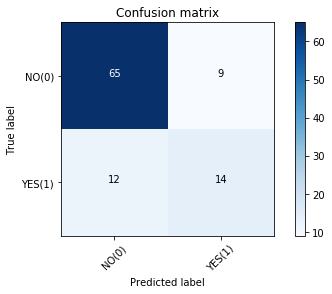

In [128]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NO(0)','YES(1)'],normalize= False,  title='Confusion matrix')

In [129]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7856575212866603

In [130]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.79